In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px
import scipy.stats as stats
import scipy.cluster.hierarchy as ch

In [2]:
data = {
    'CustomerId': [1001,1002,1003,1004,1005],
    'Age': [33,28,42,51,37],
    'Gender': ['Male','Female','Male','Female','Male'],
    'MaritalStatus': ['Married','Single','Single','Married','Divorced'],
    'AnnualIncome (USD)': [65000, 45000, 55000, 80000, 58000],
    'TotalPurchases': [18,15,20,12,10],
    'PreferredCategory': ['Electronics','Appliances','Electronics','Electronics','Appliances']
}
data = pd.DataFrame(data)

In [3]:
data

,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,33,Male,Married,65000,18,Electronics
1,1002,28,Female,Single,45000,15,Appliances
2,1003,42,Male,Single,55000,20,Electronics
3,1004,51,Female,Married,80000,12,Electronics
4,1005,37,Male,Divorced,58000,10,Appliances


In [4]:
additional_rows = 500 - len(data)
new_rows = []

for i in range(additional_rows):
    new_id = max(data['CustomerId']) + i + 1
    age = np.random.randint(25, 75)
    gender = np.random.choice(['Male', 'Female'])
    marital_status = np.random.choice(['Single', 'Married', 'Divorced'])
    income = np.random.randint(35000, 100000)
    purchases = np.random.randint(10, 40)
    category = np.random.choice(['Electronics', 'Appliances'])

    new_row = {
        'CustomerId': new_id,
        'Age': age,
        'Gender': gender,
        'MaritalStatus': marital_status,
        'AnnualIncome (USD)': income,
        'TotalPurchases': purchases,
        'PreferredCategory': category
    }
    new_rows.append(new_row)

data = pd.concat([data, pd.DataFrame(new_rows)], ignore_index=True)
data.tail()

,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
495,1496,48,Female,Single,49444,10,Appliances
496,1497,68,Female,Divorced,67917,25,Electronics
497,1498,58,Female,Single,75464,23,Electronics
498,1499,32,Male,Divorced,79715,19,Appliances
499,1500,61,Female,Married,64695,29,Appliances


In [5]:
data

,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,33,Male,Married,65000,18,Electronics
1,1002,28,Female,Single,45000,15,Appliances
2,1003,42,Male,Single,55000,20,Electronics
3,1004,51,Female,Married,80000,12,Electronics
4,1005,37,Male,Divorced,58000,10,Appliances
...,...,...,...,...,...,...,...
495,1496,48,Female,Single,49444,10,Appliances
496,1497,68,Female,Divorced,67917,25,Electronics
497,1498,58,Female,Single,75464,23,Electronics
498,1499,32,Male,Divorced,79715,19,Appliances


In [6]:
data.shape

(500, 7)

In [7]:
data.info

<bound method DataFrame.info of      CustomerId  Age  Gender MaritalStatus  AnnualIncome (USD)  \
0          1001   33    Male       Married               65000   
1          1002   28  Female        Single               45000   
2          1003   42    Male        Single               55000   
3          1004   51  Female       Married               80000   
4          1005   37    Male      Divorced               58000   
..          ...  ...     ...           ...                 ...   
495        1496   48  Female        Single               49444   
496        1497   68  Female      Divorced               67917   
497        1498   58  Female        Single               75464   
498        1499   32    Male      Divorced               79715   
499        1500   61  Female       Married               64695   

     TotalPurchases PreferredCategory  
0                18       Electronics  
1                15        Appliances  
2                20       Electronics  
3              

In [8]:
data.describe()

,CustomerId,Age,AnnualIncome (USD),TotalPurchases
count,500.000000,500.000000,500.000000,500.00000
mean,1250.500000,49.036000,67354.378000,24.40000
std,144.481833,14.477912,18936.930653,8.46826
min,1001.000000,25.000000,35075.000000,10.00000
25%,1125.750000,36.000000,50596.250000,17.00000
50%,1250.500000,49.000000,67647.500000,24.00000
75%,1375.250000,62.000000,84767.750000,31.00000
max,1500.000000,74.000000,99839.000000,39.00000


### EXPLORATORY DATA ANALYSIS

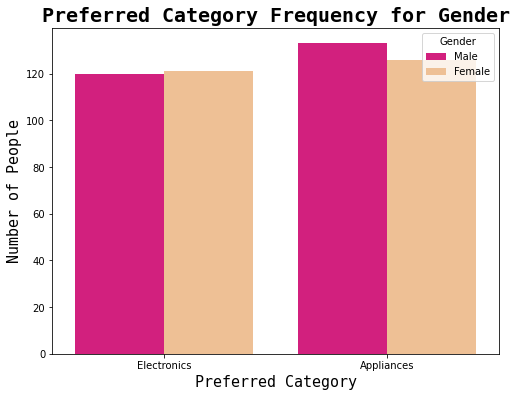

In [9]:
plt.figure(figsize=[8,6])
sb.countplot(data = data ,x = 'PreferredCategory', hue = 'Gender',palette = 'Accent_r')
plt.title('Preferred Category Frequency for Gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Preferred Category', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

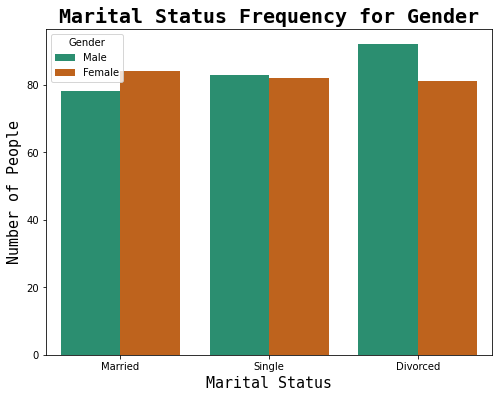

In [10]:
plt.figure(figsize=[8,6])
sb.countplot(data = data ,x = 'MaritalStatus', hue = 'Gender', palette = 'Dark2')
plt.title('Marital Status Frequency for Gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

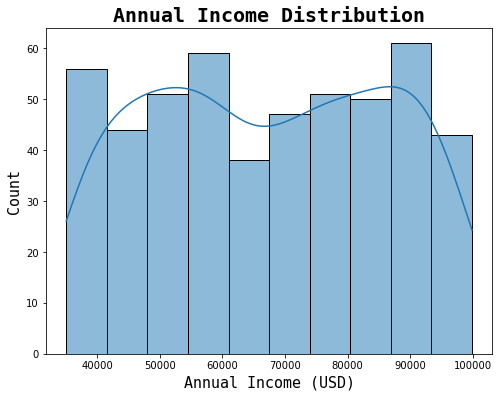

In [11]:
plt.figure(figsize=(8, 6))
sb.histplot(data = data, x = 'AnnualIncome (USD)', kde = True, palette = 'CMRmap')
plt.title('Annual Income Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Annual Income (USD)', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

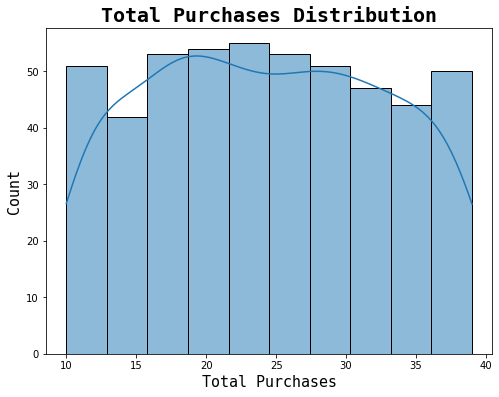

In [12]:
plt.figure(figsize=(8, 6))
sb.histplot(data = data, x = 'TotalPurchases', kde = True)
plt.title('Total Purchases Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Total Purchases', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


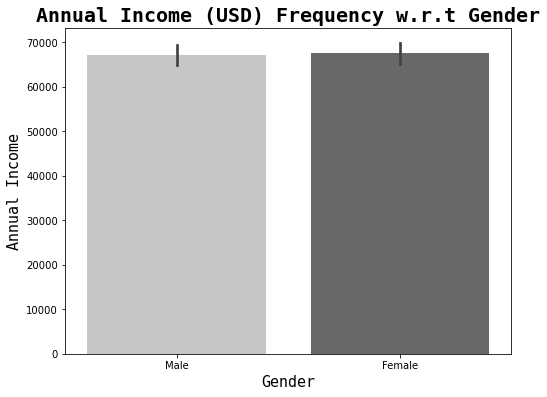

In [13]:
plt.figure(figsize=[8,6])
sb.barplot(data['Gender'], data['AnnualIncome (USD)'], palette = 'Greys')
plt.title('Annual Income (USD) Frequency w.r.t Gender', fontdict={'fontname': 'Monospace', 'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Annual Income', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


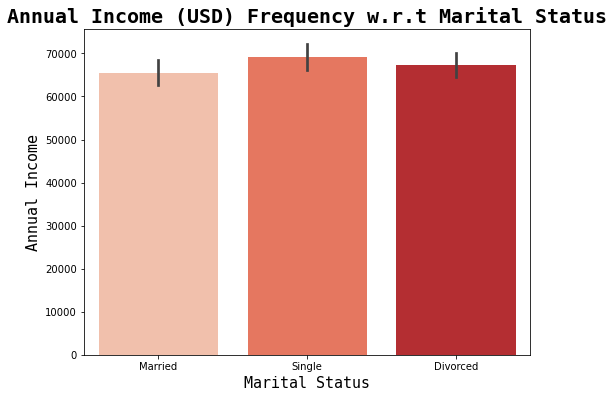

In [24]:
plt.figure(figsize=[8,6])
sb.barplot(data['MaritalStatus'], data['AnnualIncome (USD)'], palette = 'Reds')
plt.title('Annual Income (USD) Frequency w.r.t Marital Status', fontdict={'fontname': 'Monospace', 'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Annual Income', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


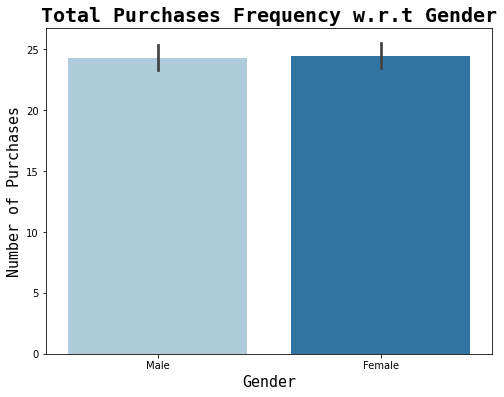

In [14]:
plt.figure(figsize=[8,6])
sb.barplot(data['Gender'], data['TotalPurchases'], palette = 'Paired')
plt.title('Total Purchases Frequency w.r.t Gender', fontdict={'fontname': 'Monospace', 'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of Purchases', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


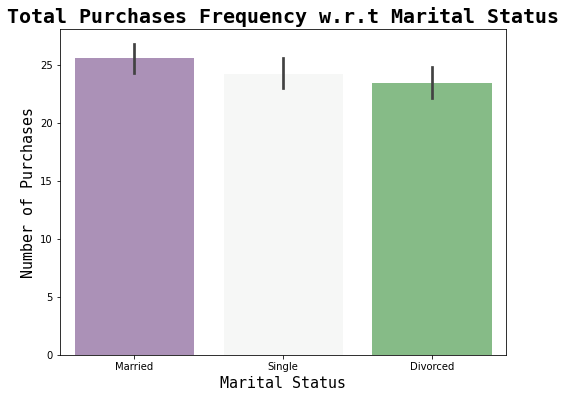

In [22]:
plt.figure(figsize=[8,6])
sb.barplot(data['MaritalStatus'], data['TotalPurchases'], palette = 'PRGn')
plt.title('Total Purchases Frequency w.r.t Marital Status', fontdict={'fontname': 'Monospace', 'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of Purchases', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

Text(0, 0.5, 'Number of People')

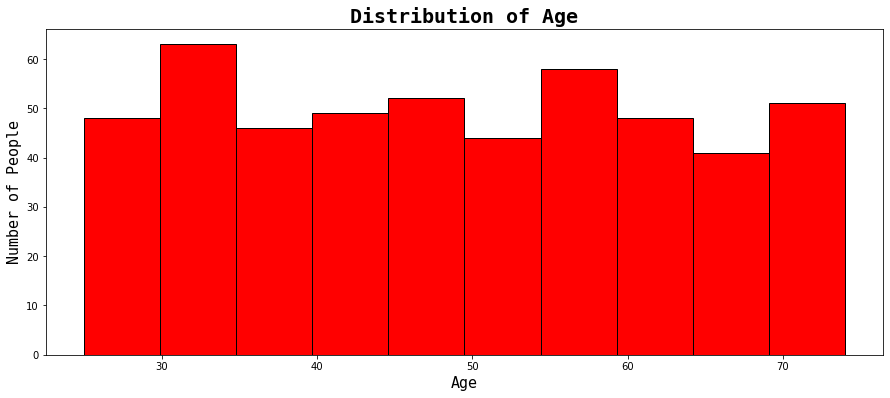

In [15]:
plt.figure(figsize=[15,6])
plt.hist(data = data, x = 'Age', color = 'red', ec = 'black')
plt.title('Distribution of Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})

Text(0, 0.5, 'Age')

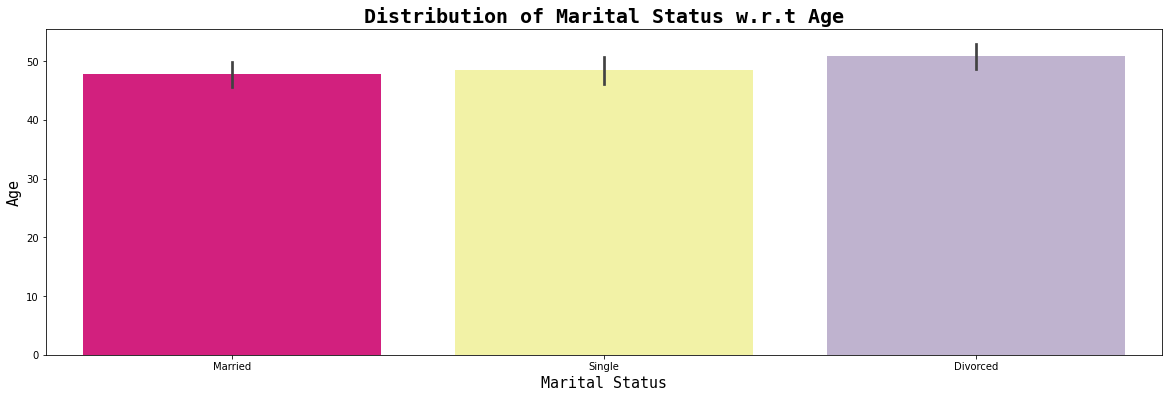

In [16]:
plt.figure(figsize=[20,6])
sb.barplot(data = data, x = 'MaritalStatus', y = 'Age', palette = 'Accent_r')
plt.title('Distribution of Marital Status w.r.t Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})

### K-MEANS

In [25]:
data1 = data.copy()

In [26]:
data1 = data1.apply(LabelEncoder().fit_transform)
data1

,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,0,8,1,1,232,8,1
1,1,3,0,2,74,5,0
2,2,17,1,2,155,10,1
3,3,26,0,1,338,2,1
4,4,12,1,0,185,0,0
...,...,...,...,...,...,...,...
495,495,23,0,2,115,0,0
496,496,43,0,0,253,15,1
497,497,33,0,2,305,13,1
498,498,7,1,0,337,9,0


In [27]:
category = data1['PreferredCategory']

In [28]:
scaler = StandardScaler().fit(data1.drop('PreferredCategory', axis = 1))
features = scaler.transform(data1.drop('PreferredCategory', axis = 1))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, category, test_size = 0.1)

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

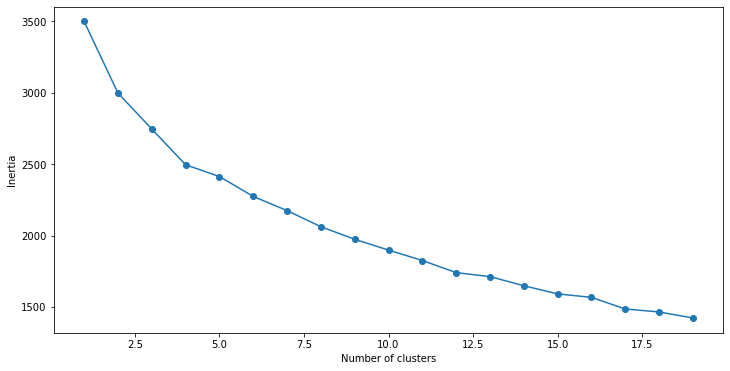

In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
pd.DataFrame(data_scaled)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [34]:
kmeans = KMeans(n_clusters = 9, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    65
6    65
4    63
3    62
1    56
0    52
8    50
2    48
7    39
Name: cluster, dtype: int64